Лабораторная работа №2. Возможный план, близкий к изложенному во второй лекции. 

Реализовать вычисление дискретного преобразования Фурье для типовых последовательностей (единичный импульс, единичный скачок,синусоидальное колебание).
Проверить полученный результат с существующими реализациями дискретного преобразования Фурье на основе алгоритма быстрого преобразования Фурье, 
а также с теоретическим расчётом. 

Построить амплитудные и фазовые спектры сигналов. С использованием дискретного преобразования Фурье проанализировать спектральный состав сигнала паровозного гудка. 
Построить амплитудный спектр сигнала. Определить на каких частотах расположены три основные гармоники сигнала. 

С использованием дискретного преобразования Фурье / оконного преобразования Фурье построить амплитудный спектр / спектрограмму
сигнала первого спутника (04.10.1957, СССР). 
Проанализировать полученный результат. 

Проанализировать с использованием оконного преобразования Фурье двухтональный многочастотный сигнал (Dual-Tone Multi-Frequency, DTMF). 

Определить «номер телефона» (порядок набора цифр) закодированный в нём. Требуется ответить на вопрос: «Какой спектр сигнала (амплитудный или фазовый)  более информативен?» Для ответа на вопрос требуется вычислить амплитудный и фазовый спектры сигнала, а затем выполнить реконструкцию сигнала, используя обратное преобразование Фурье, двумя способами: только по амплитудному спектру, обнулив фазовый; только по фазовому спектру, положив амплитудный равным единице.
Прослушать полученные сигнала и сделать соответствующие выводы. 

Для некоторого речевого сигнала реализовать алгоритм построения мел-частотных кепстральных коэффициентов (Mel-Frequency Cepstral Coefficients, MFCCs).
        

In [28]:
from scipy.fft import fft, ifft, dct

In [29]:
import librosa
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [8]:
def frame_audio(audio, FFT_size=2048, hop_size=10, sample_rate=44100):
    audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num,FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    
    return frames

In [150]:
import numpy as np

def DFT(x):
    n = np.arange(x.shape[0])
    k = n.reshape(((x.shape[0]), 1))
    W_n = np.exp(-1j * 2 *np.pi * k * n / (x.shape[0]))
    W_n = np.dot(W_n, x)
    return W_n

In [151]:
sig = np.array([0.5, 0.4, 0.1, 0.7])
print(np.allclose(DFT(sig), np.fft.fft(sig)))
print('sig: ',DFT(sig),' = ', np.fft.fft(sig))

single_impulse = np.array([0, 0, 1, 1])
print(np.allclose(DFT(single_impulse), np.fft.fft(single_impulse)))
print('single_impulse:',DFT(single_impulse),' = ', np.fft.fft(single_impulse))

jump = np.array([1, 0, 0, 0])
print(np.allclose(DFT(jump), np.fft.fft(jump)))
print('jump: ',DFT(jump),' = ', np.fft.fft(jump))

True
sig:  [ 1.7+0.00000000e+00j  0.4+3.00000000e-01j -0.5-2.81668764e-16j
  0.4-3.00000000e-01j]  =  [ 1.7+0.j   0.4+0.3j -0.5+0.j   0.4-0.3j]
True
single_impulse: [ 2.+0.0000000e+00j -1.+1.0000000e+00j  0.-1.2246468e-16j
 -1.-1.0000000e+00j]  =  [ 2.+0.j -1.+1.j  0.+0.j -1.-1.j]
True
jump:  [1.+0.j 1.+0.j 1.+0.j 1.+0.j]  =  [1.+0.j 1.+0.j 1.+0.j 1.+0.j]


[0.00000000e+00 2.26757370e-04 4.53514739e-04 ... 2.99931973e+00
 2.99954649e+00 2.99977324e+00]
x  [0.00000000e+00 2.26757370e-04 4.53514739e-04 ... 2.99931973e+00
 2.99954649e+00 2.99977324e+00] y  [ 0.          0.00178095  0.00356189 ... -0.99998573 -0.99999366
 -0.99999841]
===== <class 'numpy.ndarray'>
(13230,)


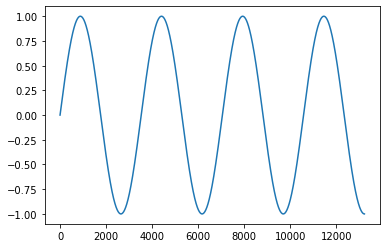

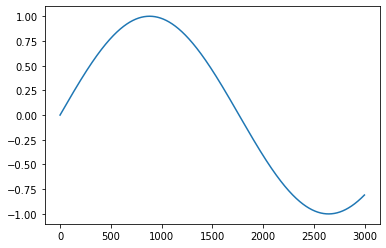

In [152]:
from matplotlib import pyplot as plt

sr = 4410
l = 3
fr = 5 
x = np.linspace(0, l, sr*l, endpoint=False)
print(x)

y = np.sin((2 * np.pi) * x * fr/4)
print('x ', x, 'y ',y)
print('=====',type(y))
print(y.shape)

plt.plot(y)
plt.show()

x_sin = y[:3000]
plt.plot(x_sin)
plt.show()

In [153]:
print(np.allclose(DFT(x_sin), np.fft.fft(x_sin)))
print('sin: ',DFT(x_sin),' = ', np.fft.fft(x_sin))

True
sin:  [ 230.89177252   +0.j         -601.43011871-1392.7277095j
  -50.45514799 -235.38923258j ...  -19.7317893  +139.78941006j
  -50.45514799 +235.38923259j -601.43011871+1392.7277095j ]  =  [ 230.89177252   +0.j         -601.43011871-1392.7277095j
  -50.45514799 -235.38923258j ...  -19.7317893  +139.78941006j
  -50.45514799 +235.38923258j -601.43011871+1392.7277095j ]


# Паровозный гудок

In [63]:
import wave
import sys
from scipy.io.wavfile import write
import numpy as np
import matplotlib.pyplot as plt

import soundfile as sf

filename = "train.wav"
x, sr = librosa.load(filename,sr=44100)
sf.write('tmp.wav', x, 44100)
file_w = wave.open('tmp.wav','r')

frames_w = file_w.readframes(-1)
signal_np = np.fromstring(frames_w, 'Int16')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app


In [59]:
from pylab import *
from scipy import *
import os

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


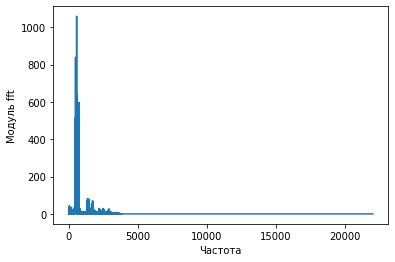

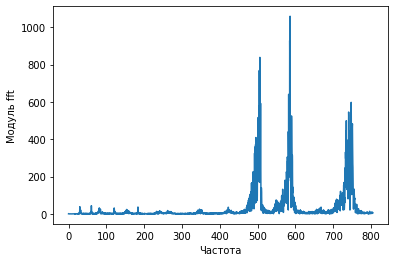

In [60]:
n = signal_np.shape[0]
k = np.arange(signal_np.shape[0])
tt  = n/sr
fr1 = k/tt 
fr1 = fr1[range(int(n/2))]
y = fft(signal_np)/n
y = abs(y[range(int(n/2))])


# subplot(2,1,2)
plot(fr1,abs(y))
xlabel('Частота')
ylabel('Модуль fft')
show()

plot(fr1[:3000],abs(y[:3000]))
xlabel('Частота')
ylabel('Модуль fft')
show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """Entry point for launching an IPython kernel.


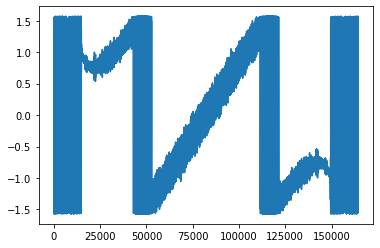

In [55]:
y = fft(x)
a, phase = np.abs(y), np.angle(y)
n = y.shape[0]

# plt.plot(phase)
# plt.show()

# # plt.plot(phase[:int(n/2)])
# # plt.show()

# phase2 = np.arctan2(y.imag, y.real)
# plt.plot(phase2)
# plt.show()

ph3 = np.arctan(y.imag / y.real)
np.nan_to_num(ph3, nan=np.pi/2)
plt.plot(ph3)
plt.show()

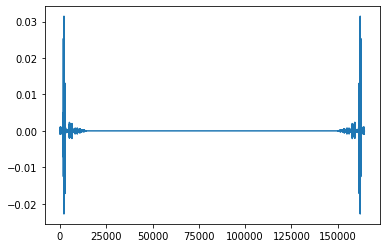

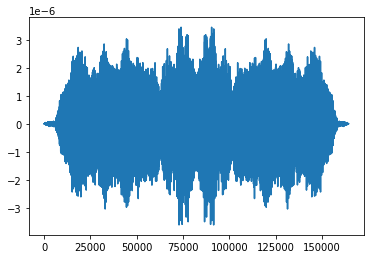

In [67]:
y1 = fft.ifft(x).real
plt.plot(y1)
plt.show()
y2 = fft.ifft(x)
y2.imag = 0
out = fft.ifft(y2).real
plt.plot(out)
plt.show()
Audio(out, rate=sr)

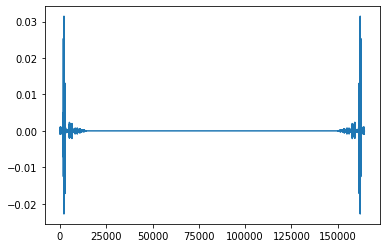

In [70]:
y3 = fft.ifft(x)
amp0 /= np.abs(y3)
out = y3.real
plt.plot(out)
plt.show()
Audio(out, rate=sr)

# Спутник 

In [166]:
import wave
import sys
from scipy.io.wavfile import write
import numpy as np
import matplotlib.pyplot as plt

import soundfile as sf

filename = "sputnik_1.wav"
x, sr = librosa.load(filename,sr=44100)
sf.write('tmp.wav', x, 44100)
file_w = wave.open('tmp.wav','r')

frames_w = file_w.readframes(-1)
signal_np = np.fromstring(frames_w, 'Int16')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app


In [44]:
from skimage.util import view_as_windows
from scipy.fft import fft

def STFT(x,len_w, step_w, win_vid = 'hamm'):
    
    if win_vid == 'hamm': 
        win_vid = np.hamming
    else:
        win_vid = np.hanning
        
    win = np.hamming(len_w)
    frame = (view_as_windows(x, window_shape=(len_w,), step=step_w))
    frame = frame*win
    frameT = frame.T
    
    fur = fft(frameT, axis=0, workers=8)[:len_w // 2]
    fur = np.abs(fur)
    return fur
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


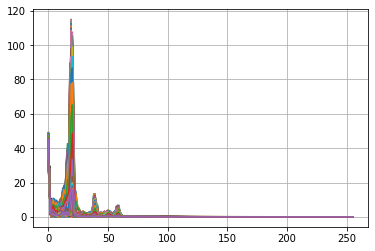

In [168]:
y = STFT(x, 512, 64,win_vid = 'hamm')
t = arange(0,len(y),1)


plt.plot(t, abs(y))
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


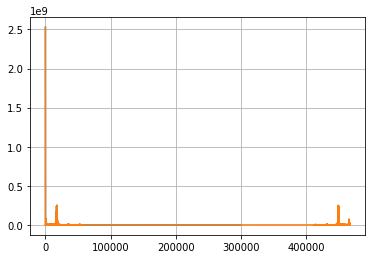

In [169]:
y = (fft(signal_np))
t = arange(0,len(y),1)

plt.plot(t[:300000], abs(y[:300000]))
plt.plot(t, abs(y))
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


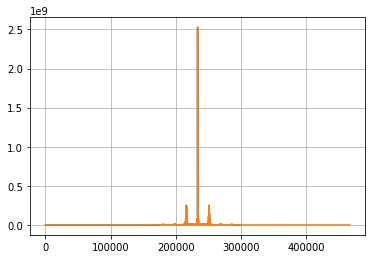

In [170]:
y = fftshift(fft(signal_np))
t = arange(0,len(y),1)

plt.plot(t[:300000], abs(y[:300000]))
plt.plot(t, abs(y))
plt.grid(True)
plt.show()

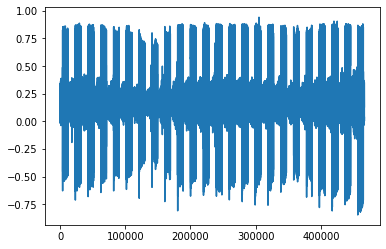

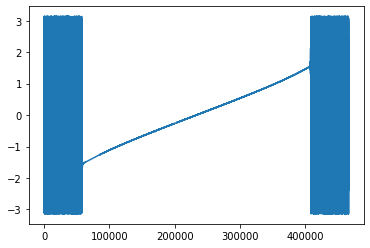

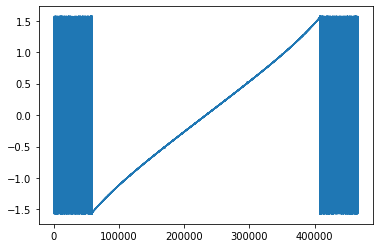

In [181]:
y = fft(x)
a, phase = np.abs(y), np.angle(y)
n = y.shape[0]

plt.plot(x)
plt.show()

# plt.plot(phase)
# plt.show()

# plt.plot(phase[:int(n/2)])
# plt.show()


# y = fft(x)
# print(y)
# plt.plot(fr1[:300],(-1*np.arctan2(y.imag,y.real))[:300]) 
# plt.show()
# plt.plot(fr1[:300],(np.arctan2(y.imag,y.real))[:300]) 
# plt.show()
# y2 = np.fft.rfft(x)
# plt.plot(fr1[:8000],(np.arctan2(y2.imag,y2.real))[:8000]) 
# plt.show()

phase2 = np.arctan2(y.imag, y.real)
plt.plot(phase2)
plt.show()

# ph3 = np.arctan(y.imag / y.real)
# np.nan_to_num(ph3, nan=np.pi/2)
# plt.plot(ph3)
# plt.show()

# Номер

In [37]:
import wave
import sys
from scipy.io.wavfile import write
import numpy as np
import matplotlib.pyplot as plt

import soundfile as sf

filename = "dtmf.wav"
x, sr = librosa.load(filename,sr=44100)
sf.write('tmp.wav', x, 44100)
file_w = wave.open('tmp.wav','r')

frames_w = file_w.readframes(-1)
signal_np = np.fromstring(frames_w, 'Int16')
n = x.shape[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app


In [45]:
y = STFT(x, 512, 64,win_vid = 'hamm')
# t = arange(0,len(y),1)

# plt.plot(t, abs(y))
# # plt.plot(t, abs(y))
# plt.grid(True)
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


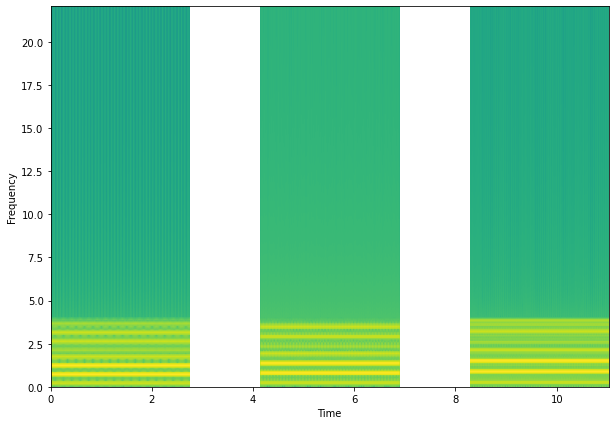

In [46]:

spectr = 20 * np.log10(y / np.max(y))
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(spectr, origin='lower', cmap='viridis', extent=(0, n / sr, 0, sr / 2 / 1000))
ax.axis('tight')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
plt.show()

In [47]:
part = x[0 * sr:2 * sr] 
# print(part)
spec_part = fft(part)[:part.shape[0] // 2]
mag = np.abs(spec_part)
uni,ind = np.unique(mag, return_index=True)
max_h = ind[np.argsort(uni)[-2:]]
print("--------", max_h / part.shape[0] * sr, ' = 1')

part = x[4 * sr:6 * sr] 
# print(part)
spec_part = fft(part)[:part.shape[0] // 2]
mag = np.abs(spec_part)
uni,ind = np.unique(mag, return_index=True)
max_h = ind[np.argsort(uni)[-2:]]
print("--------", max_h / part.shape[0] * sr,' = 5')

part = x[8 * sr:10 * sr] 
# print(part)
spec_part = fft(part)[:part.shape[0] // 2]
mag = np.abs(spec_part)
uni,ind = np.unique(mag, return_index=True)
max_h = ind[np.argsort(uni)[-2:]]
print("--------", max_h / part.shape[0] * sr,' = 9')



-------- [1209.  697.]  = 1
-------- [ 770. 1336.]  = 5
-------- [1477.  852.]  = 9


In [48]:
Audio(x, rate=sr)

# Mel-Frequency

In [16]:
import wave
import sys
from scipy.io.wavfile import write
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa.filters

import soundfile as sf

filename = "human_speech.wav"
x, sr = librosa.load(filename,sr=44100)
sf.write('tmp.wav', x, 44100)
file_w = wave.open('tmp.wav','r')

frames_w = file_w.readframes(-1)
signal_np = np.fromstring(frames_w, 'Int16')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [21]:
from scipy import signal

In [22]:
hop_size = 15 
FFT_size = 2048

audio_framed = frame_audio(x, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sr)

In [23]:
window = signal.get_window ("hann", FFT_size, fftbins=True)

In [24]:
audio_win = audio_framed * window

In [25]:
# мы возьмем только положительную часть спектра (первая половина +1)

audio_winT = np.transpose(audio_win)
audio_fft = np.empty((int(1 + FFT_size // 2), audio_winT.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft.shape[1]):
    audio_fft[:, n] = fft.fft(audio_winT[:, n], axis=0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)
audio_power = np.square(np.abs(audio_fft))

In [32]:
import math

In [33]:
def FtM(freq):
    return 1127.01048 * math.log(1 + freq / 700.0)

def MtF(mel):
    return  700.0 * (10.0**(mel / 2595.0) - 1.0)
# 700 * (math.exp(mel / 1127.01048 - 1)) # 700.0 * (10.0**(mels / 2595.0) - 1.0)

In [34]:
maxFr = sr
minFr = 0
maxMel = int(FtM(maxFr))
minMel = int(FtM(minFr))
num_f = 18

In [35]:
def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sample_rate=44100):
    fmin_mel = FtM(fmin)
    fmax_mel = FtM(fmax)    
    mels = np.linspace(fmin_mel, fmax_mel, num=mel_filter_num+2)
    freqs = MtF(mels)
    
    return np.floor((FFT_size + 1) / sample_rate * freqs).astype(int), freqs

In [36]:
freq_min = 0
freq_high = sr / 2

filter_points, mel_freqs = get_filter_points(freq_min, freq_high, num_f, FFT_size, sample_rate=44100)

In [226]:
def get_filters(filter_points, FFT_size):
    filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))
    
    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
    
    return filters

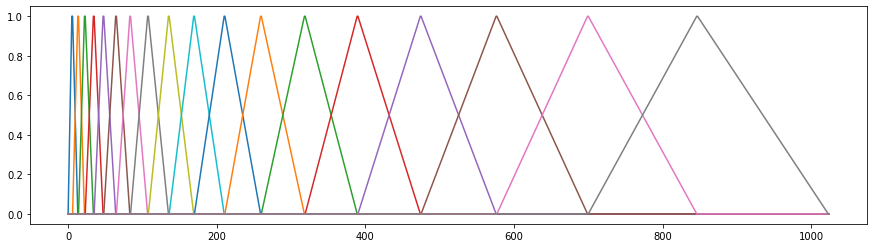

In [227]:
filters = get_filters(filter_points, FFT_size)

plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

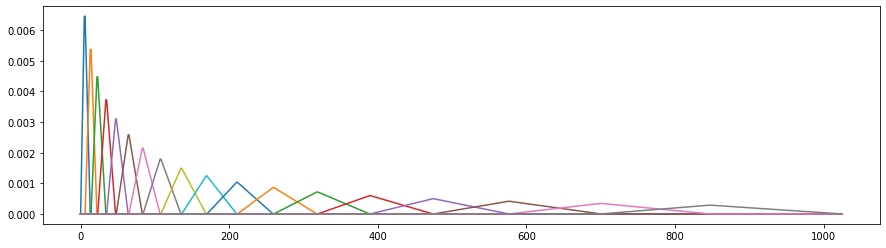

In [228]:
enorm = 2.0 / (mel_freqs[2:num_f+2] - mel_freqs[:num_f])
filters *= enorm[:, np.newaxis]
plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

In [1]:

# mels = librosa.power_to_db(librosa.feature.melspectrogram(x, sr=sr, n_fft=FFT_size, hop_length=hop_size))
# mfcc_lib = librosa.feature.mfcc(filename, sr, S=mels, n_fft=FFT_size, hop_length=hop_length, n_mfcc=n_mfcc)
# # mfcc = get_mfcc(wav, sr, window_ms=window_ms, step_mc=step_mc, n_mfcc=n_mfcc)

# if not np.allclose(mfcc_lib, mfcc):
#     print("-")
# else: print("+")


+


In [229]:
mels = np.linspace(minMel, maxMel, num=18+2)

freqs = MtF(mels)
points = np.floor((FFT_size + 1) / sr * freqs).astype(int), freqs
n_points = len(points)
print('n_points',n_points)
print(points)
# flip
# stft = STFT(x, 512, 64,win_vid = 'hamm')
# power = stft**2
# n = signal_np.shape[0]

n_points 2
(array([   0,    7,   17,   30,   45,   64,   88,  118,  154,  200,  257,
        328,  417,  527,  664,  834, 1046, 1310, 1639, 2048]), array([    0.        ,   171.28330578,   384.47799848,   649.83939367,
         980.13218456,  1391.24446274,  1902.95198386,  2539.86944184,
        3332.63451085,  4319.38161091,  5547.57628992,  7076.29846146,
        8979.08432894, 11347.46370155, 14295.36285742, 17964.58474549,
       22531.6301402 , 28216.18786757, 35291.70250847, 44098.52791768]))


In [213]:
def get_filters(filter_points, size):
    print('+')
    print((len(filter_points)-2))
    filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))
    print('filters',filters )
    
    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
    
    return filters

In [214]:
filters = get_filters(points, n)
print(filters)
plt.figure(figsize=(15,4))
for i in range(filters.shape[0]):
    plt.plot(filters[i])


+
0
filters []
[]


<Figure size 1080x288 with 0 Axes>